In [454]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

In [455]:
df = pd.read_csv('american_bankruptcy.csv')
df.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [456]:
#ColumnNamesDictionary Relates the Short Names to the actual name
#dict contains the information describing what the name of the actual column means

ColumnNamesDictionary = {'X1':'Current assets','X2':'Cost of goods sold',
                   'X3':'Depreciation and amortization','X4':'EBITDA',
                   'X5':'Inventory','X6':'Net Income','X7':'Total Receivables',
                   'X8':'Market value','X9':'Net sales','X10':'Total assets',
                   'X11':'Total Long-term debt','X12':'EBIT','X13':'Gross Profit',
                   'X14':'Total Current Liabilities','X15':'Retained Earnings',
                   'X16':'Total Revenue','X17':'Total Liabilities','X18':'Total Operating Expenses'}

dict = {}
dict['Current assets'] = 'Current assets - All the assets of a company that are expected to be sold or used as a result of standard.\
business operations over the next year'
dict['Cost of goods sold'] = 'Cost of goods sold - The total amount a company paid as a cost directly related to the sale of products'
dict['Depreciation and amortization'] = 'Depreciation and amortization - Depreciation refers to the loss of value of a tangible fixed asset over.\
time (such as property, machinery, buildings, and plant). Amortization refers to the loss of value of.\
intangible assets over time.'
dict['EBITDA'] = 'EBITDA - Earnings before interest, taxes, depreciation, and amortization. It is a measure of a company"s.\
overall financial performance, serving as an alternative to net income.'
dict['Inventory'] = 'Inventory - The accounting of items and raw materials that a company either uses in production or sells.'
dict['Net Income'] = 'Net Income - The overall profitability of a company after all expenses and costs have been deducted from.\
total revenue.'
dict['Total Receivables'] = 'Total Receivables - The balance of money due to a firm for goods or services delivered or used but not.\
yet paid for by customers.'
dict['Market value'] = 'Market value - The price of an asset in a marketplace. In this dataset, it refers to the market.\
capitalization since companies are publicly traded in the stock market.'
dict['Net sales'] = 'Net sales - The sum of a company"s gross sales minus its returns, allowances, and discounts.'
dict['Total assets'] = 'Total assets - All the assets, or items of value, a business owns.'
dict['Total Long-term debt'] = 'Total Long-term debt - A company"s loans and other liabilities that will not become due within one year.\
of the balance sheet date.'
dict['EBIT'] = 'EBIT - Earnings before interest and taxes.'
dict['Gross Profit'] = 'Gross Profit - The profit a business makes after subtracting all the costs that are related to.\
manufacturing and selling its products or services.'
dict['Total Current Liabilities'] = 'Total Current Liabilities - The sum of accounts payable, accrued liabilities, and taxes such as Bonds.\
payable at the end of the year, salaries, and commissions remaining.'
dict['Retained Earnings'] = 'Retained Earnings - The amount of profit a company has left over after paying all its direct costs,.\
indirect costs, income taxes, and its dividends to shareholders.'
dict[ 'Total Revenue'] = 'Total Revenue - The amount of income that a business has made from all sales before subtracting expenses..\
It may include interest and dividends from investments.'
dict['Total Liabilities'] = 'Total Liabilities - The combined debts and obligations that the company owes to outside parties.'
dict['Total Operating Expenses'] = 'Total Operating Expenses - The expenses a business incurs through its normal business operations.'

In [457]:
df = pd.get_dummies(df, columns=['status_label'], dtype = int)
df = df.drop('status_label_failed', axis = 1)
col = df.pop('status_label_alive')   # remove and keep the column
df.insert(0, 'status_label_alive', col)
df.head()

,status_label_alive,company_name,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,1,C_1,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,1,C_1,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,1,C_1,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,1,C_1,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,1,C_1,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [458]:
#no missing data
description = df.describe(percentiles=[0.25, 0.75, 0.95]).T
dataDescription = pd.DataFrame({'missing':df.isnull().sum(),'nUnique':df.nunique()})
dataDescribeStat = dataDescription.merge(description, left_index=True, right_index=True, how='outer')
dataDescribeStat.head()

,missing,nUnique,count,mean,std,min,25%,50%,75%,95%,max
X1,0,65895,78682.0,880.362485,3928.564794,-7.760,18.92400,100.4495,431.52675,3507.98500,169662.0
X10,0,71521,78682.0,2867.110620,12917.944421,0.001,37.36350,213.2035,1171.36475,12220.83930,531864.0
X11,0,39741,78682.0,722.483710,3242.170946,-0.023,0.00000,7.5935,248.76075,3328.55150,166250.0
X12,0,56949,78682.0,255.525035,1494.643534,-25913.000,-2.78700,6.5180,87.59900,1066.89905,71230.0
X13,0,64952,78682.0,769.490783,3774.703114,-21536.000,8.52125,63.5815,344.07425,2979.48770,137106.0


In [459]:
alive_count = df[df['status_label_alive'] == 1]['status_label_alive'].count()
total_count = df['status_label_alive'].count()
print('Alive Ratio:', alive_count/total_count)
print('Failed Ratio:', 1 - alive_count/total_count)

Alive Ratio: 0.9336569990595054
Failed Ratio: 0.06634300094049461


<span style="font-size:16px">

Observe a small Failed Ratio, it is going to be important to account for in the classification


</span>

In [460]:
df.head()

,status_label_alive,company_name,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,1,C_1,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,1,C_1,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,1,C_1,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,1,C_1,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,1,C_1,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


## Analyze Outliers

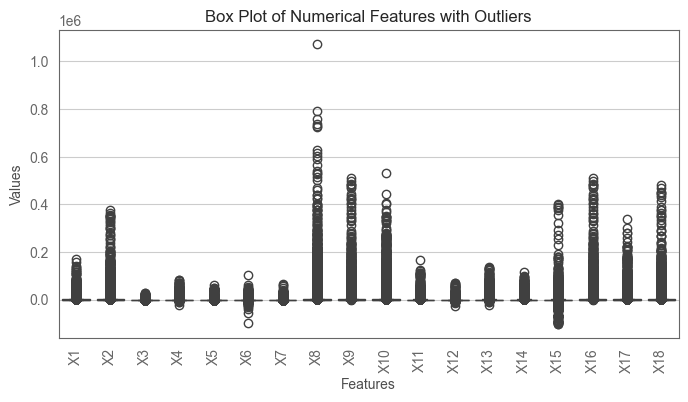

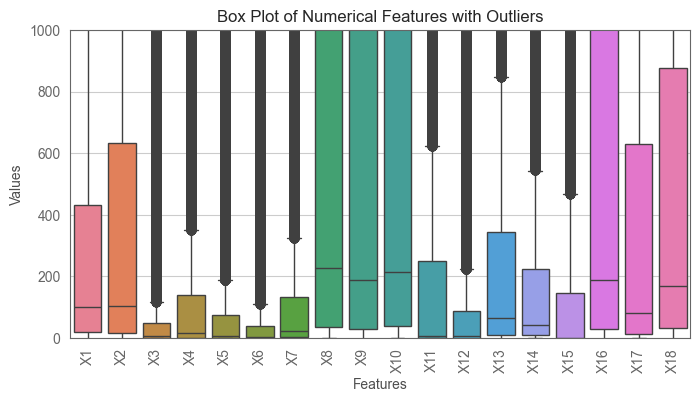

In [461]:
Q1 = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']].quantile(0.25)
Q3 = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']].quantile(0.75)

IQR = Q3 - Q1
outliers = ((df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']] < (Q1 - 1.5 * IQR))
             | (df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']] > (Q3 + 1.5 * IQR)))

plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']])
plt.xticks(rotation=90)
plt.title("Box Plot of Numerical Features with Outliers")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']])
plt.xticks(rotation=90)
plt.title("Box Plot of Numerical Features with Outliers")
plt.xlabel("Features")
plt.ylabel("Values")
plt.ylim(0,1000)
plt.show()

Very small boxplots, look absent because of a huge ammount of outliers

Let's remove the outliers and count the the amount of unique data

In [462]:
pd.DataFrame({'N_uniq':df.nunique()})

,N_uniq
status_label_alive,2
company_name,8971
year,20
X1,65895
X2,65690
X3,36010
X4,59060
X5,38898
X6,55550
X7,49577


In [463]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[(df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']] >= lower_bound) &
               (df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']] <= upper_bound)]

dfNumClean = pd.DataFrame({'N_uniq':df.nunique()}).merge(pd.DataFrame({'N_uniq_clean':df_clean.nunique()}),
                                                          left_index=True, right_index=True, how = 'outer')

dfNumClean['diff'] = dfNumClean['N_uniq'] - dfNumClean['N_uniq_clean']
dfNumClean.head()

,N_uniq,N_uniq_clean,diff
X1,65895,55663,10232
X10,71521,60193,11328
X11,39741,28009,11732
X12,56949,45172,11777
X13,64952,54422,10530


## Correlation Matrix

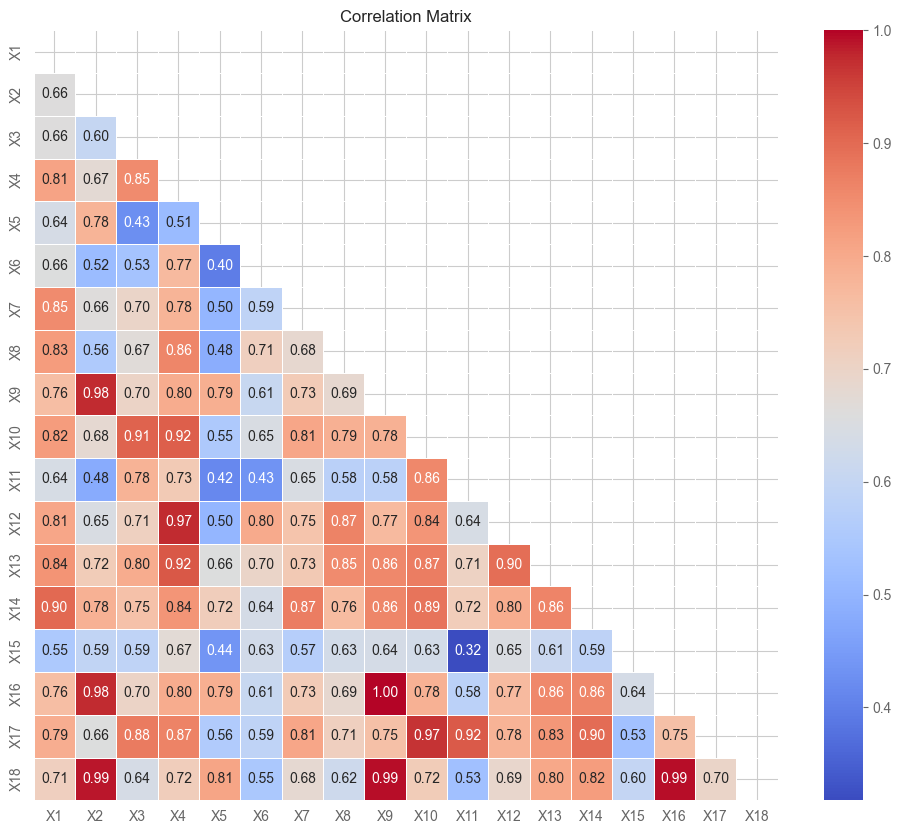

In [464]:
vars = [name for name in df.columns]
data = df[vars[3:]]
corrMatrix = data.corr()

mask = np.triu(np.ones_like(corrMatrix, dtype=bool)) #to drop the upper half the matrix, it is symmetric

plt.figure(figsize=(12, 10))
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Matrix')
plt.show()

## Pre-processing

In [465]:
df.head()
X = df.drop(columns=['company_name', 'status_label_alive'])
y = df['status_label_alive']
X.head()

,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


## Feature Selection

Determine the feature to be used in the classification model. We aim to select only the most important features, thus making the model less complex and avoid overfitting

In [ ]:
log_Reg = LogisticRegression(max_iter=1000) #high correlation of variables observed, keep that in mind for LogReg
log_Reg.fit(X, y)

rf_Model = RandomForestClassifier()
rf_Model.fit(X, y)

RandomForestClassifier()

In [155]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


/Users/dmitrii/Desktop/DS/venv/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


   feature           VIF
0     year  1.084816e+00
1       X1  1.139660e+01
2       X2  1.958087e+14
3       X3  1.045889e+12
4       X4  3.900193e+09
5       X5  4.362706e+00
6       X6  3.098459e+00
7       X7  6.928806e+00
8       X8  6.767825e+00
9       X9           inf
10     X10  4.449185e+01
11     X11  1.670853e+01
12     X12  5.462219e+12
13     X13  3.532235e+13
14     X14  2.797125e+01
15     X15  2.966199e+00
16     X16           inf
17     X17  8.289702e+01
18     X18  2.649176e+14


## Independent Variablea Are Highly Correlated --- Should not use Logistic Regression for Classification

In [453]:
log_fature_importance = pd.Series(log_Reg.coef_[0], index=X.columns).abs()
selected_features_log = log_fature_importance.nlargest(10).index.tolist() #get the 10 most important features


rf_feature_importance = pd.Series(rf_Model.feature_importances_, index=X.columns).abs()
selected_features_rf = rf_feature_importance.nlargest(10).index.tolist()

print(selected_features_log)
print(selected_features_rf)

df_log_selected = df[['status_label_alive'] + selected_features_log]
df_rf_selected = df_logit_selected = df[['status_label_alive'] + selected_features_rf]

df_rf_selected

ValueError: Length of values (19) does not match length of index (10)

## Model Building

In [207]:
X_rf = df_rf_selected.drop('status_label_alive', axis = 1)
y_rf = df_rf_selected['status_label_alive']
X_rf.head()


,X8,X15,X3,X17,X1,X7,X10,X13,X6,X14
0,372.7519,201.026,18.373,401.483,511.267,128.348,740.998,191.226,35.163,163.816
1,377.1180,204.065,18.577,361.642,485.856,115.187,701.854,160.444,18.531,125.392
2,364.5928,139.603,22.496,399.964,436.656,77.528,710.199,112.244,-58.939,150.464
3,143.3295,124.106,27.172,391.633,396.412,66.322,686.621,109.590,-12.410,203.575
4,308.9071,131.884,26.680,407.608,432.204,104.661,709.292,128.656,3.504,131.261


In [208]:
#to later test how the number of seelcted features affects the model prediction strength
def df_rf_with_num_params(n):
    selected_features_rf = rf_feature_importance.nlargest(n).index.tolist()
    df_rf_selected = df_logit_selected = df[['company_name', 'status_label_alive'] + selected_features_rf]
    return df_rf_selected


In [260]:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_rf_train, y_rf_train)
y_rf_pred = rf_model.predict(X_rf_test)
rf_accuracy = accuracy_score(y_rf_test, y_rf_pred)
mean_cross_val_score = cross_val_score(rf_model, X_rf_train, y_rf_train, cv = 5).mean()
print("Random Forest Accuracy: {:.2f}%".format(rf_accuracy * 100))
print("Cross Val Score: {:.2f}%".format(mean_cross_val_score * 100))

Random Forest Accuracy: 93.45%
Cross Val Score: 93.71%


Seems like the classifier simply marks every company is alive

$$ \text{Random Forest Accuracy} \approx  1 - \frac{\text{Alive}}{\text{Failed}}$$

check other metric

In [261]:
print('status_label_alive = 0 in y_rf_test percentage:', (1 - y_rf_test[y_rf_test == 1].count()/y_rf_test.count()) * 100 ,'%')

status_label_alive = 0 in y_rf_test percentage: 6.7865539810637365 %


## Recall

In [265]:
from sklearn.metrics import recall_score

recall_score(y_rf_test, y_rf_pred)

0.9991137773536028

Confusion Matrix:
[[   50  1018]
 [   13 14656]]


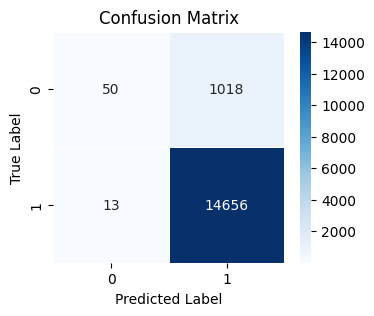

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.05      0.09      1068
           1       0.94      1.00      0.97     14669

    accuracy                           0.93     15737
   macro avg       0.86      0.52      0.53     15737
weighted avg       0.93      0.93      0.91     15737



In [269]:
cm = confusion_matrix(y_rf_test, y_rf_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

cr = classification_report(y_rf_test, y_rf_pred)
print("Classification Report:")
print(cr)

### the model practically does not catch the failures

In [301]:
df_rf_selected_0 = df_rf_selected[df_rf_selected['status_label_alive'] == 0]
df_rf_selected_1 = df_rf_selected[df_rf_selected['status_label_alive'] == 1]
X_0 = df_rf_selected_0.drop('status_label_alive',axis=1)
X_1 = df_rf_selected_1.drop('status_label_alive',axis=1)
y_0 = df_rf_selected_0['status_label_alive']
y_1 = df_rf_selected_1['status_label_alive']

## Classifier Trained on a Balanced set

In [319]:
import random

def random_equal(df_rf_selected):
    df_rf_selected_0 = df_rf_selected[df_rf_selected['status_label_alive'] == 0]
    df_rf_selected_1 = df_rf_selected[df_rf_selected['status_label_alive'] == 1]
    X_0 = df_rf_selected_0.drop('status_label_alive',axis=1)
    X_1 = df_rf_selected_1.drop('status_label_alive',axis=1)
    y_0 = df_rf_selected_0['status_label_alive']
    y_1 = df_rf_selected_1['status_label_alive']
    start = random.randint(0, len(X_1) - len(X_0))
    #take random part of the sample
    X_1_trunc = X_1[start:start + len(X_0)]
    y_1_trunc = y_1[start:start + len(X_0)]

    X_equal = pd.concat([X_1_trunc, X_0], axis=0, ignore_index=True)
    y_equal = pd.concat([y_1_trunc, y_0], axis=0, ignore_index=True)
    return X_equal, y_equal

Confusion Matrix:
[[804 223]
 [227 834]]


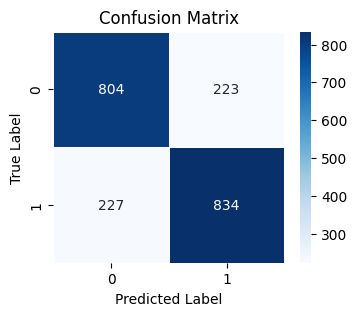

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1027
           1       0.79      0.79      0.79      1061

    accuracy                           0.78      2088
   macro avg       0.78      0.78      0.78      2088
weighted avg       0.78      0.78      0.78      2088



In [332]:
X_equal, y_equal = random_equal(df_rf_selected)

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_equal, y_equal, test_size=0.2, random_state=42)
rf_model_1 = RandomForestClassifier(random_state=42)
rf_model_1.fit(X_rf_train, y_rf_train)
y_rf_pred = rf_model_1.predict(X_rf_test)

cm = confusion_matrix(y_rf_test, y_rf_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

cr = classification_report(y_rf_test, y_rf_pred)
print("Classification Report:")
print(cr)

### Take a weighted sum of predictors

### 1. Train Trees

In [449]:
from tqdm import tqdm

def predictor_balanced_clasess(Num):
    def rf_clfs(n):
        arr = []
        for i in range(0,n):
            arr.append(RandomForestClassifier(n_estimators=3))
        return arr
    
    rfs = rf_clfs(Num)

    for n in tqdm(range(0, Num), desc="Training Models", ncols=100, bar_format="{l_bar}{bar:30}{r_bar}", colour="green"):
        X_equal, y_equal = random_equal(df_rf_selected)
        X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_equal, y_equal, test_size=0.2)
        rfs[n].fit(X_rf_train, y_rf_train)
    return rfs #contains Num RandomForest Classifiers trained on balanced datasets

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_unbalanced = RandomForestClassifier(
    n_estimators=1,  # Start with 1 tree
    warm_start=True,  # Enable incremental training
    n_jobs=-1,       # Use all CPU cores
    random_state=42
)

# Train with progress bar
for _ in tqdm(range(100), desc="Training Progress", unit="tree"):
    rf_unbalanced.n_estimators += 1  # Add one tree per iteration
    rf_unbalanced.fit(X_rf_train, y_rf_train)  # Fit incrementally

rfs_balanced = predictor_balanced_clasess(10)

Training Models: 100%|██████████████████████████████| 10/10 [00:00<00:00, 19.19it/s]


### 2. Build Prediction

In [450]:
def prediction(Num, weight, rfs_balanced, rf_unbalanced, X_rf_test):   
    weights = np.array([1] * Num + [weight])
    probas = []
    for n in range(Num):
            model = rfs_balanced[n]
            proba = model.predict_proba(X_rf_test)  
            probas.append(proba)
    prob_unbalanced = rf_unbalanced.predict_proba(X_rf_test)
    probas.append(prob_unbalanced)
    weighted_avg_proba = np.average(probas, axis=0, weights=weights)
    y_pred = np.argmax(weighted_avg_proba, axis=1)
    return y_pred
    

### 3. Study how recall changes for Num (number of rf on balanced data), weight (strength of the rf trained on the large unbalanced dataset)

Training Models: 100%|██████████████████████████████| 10/10 [00:00<00:00, 16.05it/s]


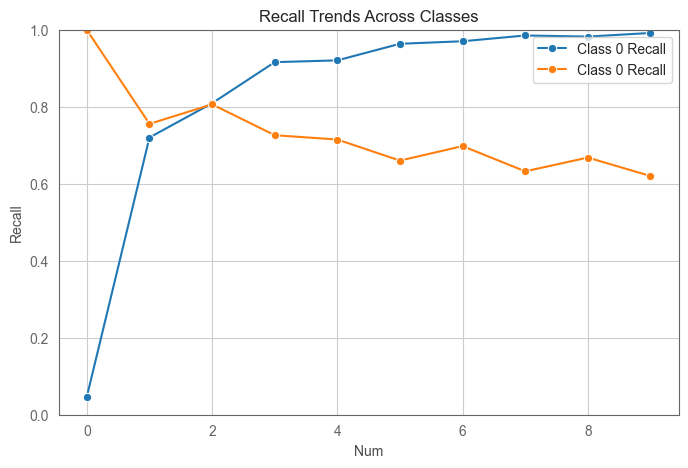

[(np.float64(0.04681647940074907), np.float64(0.9992501192992024)),
 (np.float64(0.7200374531835206), np.float64(0.7554707205671825)),
 (np.float64(0.8089887640449438), np.float64(0.8061899243302202)),
 (np.float64(0.9157303370786517), np.float64(0.7260208603176768)),
 (np.float64(0.9204119850187266), np.float64(0.7147726498057128)),
 (np.float64(0.9634831460674157), np.float64(0.6600995296202877)),
 (np.float64(0.9700374531835206), np.float64(0.6977299066057673)),
 (np.float64(0.9850187265917603), np.float64(0.6321494307723772)),
 (np.float64(0.9822097378277154), np.float64(0.6679391914922626)),
 (np.float64(0.9915730337078652), np.float64(0.6200831685868158))]

In [467]:
def calculate_recall(confusion_matrix):
    # Recall for class 0 (True Negative Rate)
    tn = confusion_matrix[0, 0]
    fp = confusion_matrix[0, 1]
    recall_0 = tn / (tn + fp) if (tn + fp) != 0 else 0
    
    # Recall for class 1 (True Positive Rate)
    tp = confusion_matrix[1, 1]
    fn = confusion_matrix[1, 0]
    recall_1 = tp / (tp + fn) if (tp + fn) != 0 else 0
    
    return recall_0, recall_1

recall_values = []
for n in tqdm(range(0, 10), desc="Training Models", ncols=100, bar_format="{l_bar}{bar:30}{r_bar}", colour="green"):
    y_pred = prediction(n, 1, rfs_balanced, rf_unbalanced, X_rf_test)
    cm = confusion_matrix(y_rf_test, y_pred)
    recall_values.append(calculate_recall(cm))

recall_class_0, recall_class_1 = zip(*recall_values)
n_equal = [i for i in range(0,10)]
plt.figure(figsize=(8, 5))
sns.lineplot(x=n_equal, y=recall_class_0,label="Class 0 Recall", marker="o")
sns.lineplot(x=n_equal, y=recall_class_1,label="Class 0 Recall", marker="o")
plt.title("Recall Trends Across Classes")
plt.xlabel('Num')
plt.ylabel('Recall')
plt.ylim(0, 1)  # Recall is between 0 and 1
plt.grid(True)
plt.show()

recall_values

Training Models: 100%|██████████████████████████████| 20/20 [00:00<00:00, 20.26it/s]


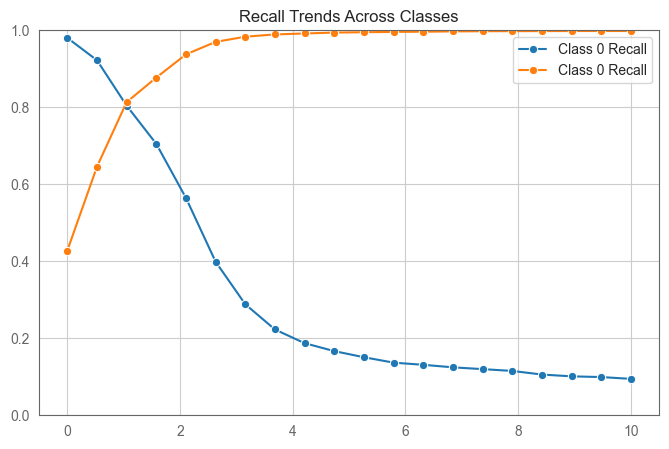

In [452]:
recall_values = []
weights = np.linspace(0,10,20)
for weight in tqdm(weights, desc="Training Models", ncols=100, bar_format="{l_bar}{bar:30}{r_bar}", colour="green"):
    y_pred = prediction(2, weight, rfs_balanced, rf_unbalanced, X_rf_test)
    cm = confusion_matrix(y_rf_test, y_pred)
    recall_values.append(calculate_recall(cm))

recall_class_0, recall_class_1 = zip(*recall_values)
plt.figure(figsize=(8, 5))
sns.lineplot(x=weights, y=recall_class_0,label="Class 0 Recall", marker="o")
sns.lineplot(x=weights, y=recall_class_1,label="Class 0 Recall", marker="o")
plt.title("Recall Trends Across Classes")
plt.ylim(0, 1)  # Recall is between 0 and 1
plt.grid(True)
plt.show()

In [ ]:
def predictor(Num, weight):
    #predictor as a function of number of forests trained on equally balanced datasets, weight determines the strength of the unbalaned predictor
    #weight can change from 0 to 1
    weights = [1] * Num + [weight]
    weights = np.array(weights)
    def rf_clfs(n):
        arr = []
        for i in range(0,n):
            arr.append(RandomForestClassifier(n_estimators=3))
        return arr
    
    rfs = rf_clfs(Num)

    for i in range(0, Num):
        X_equal, y_equal = random_equal(df_rf_selected)
        X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_equal, y_equal, test_size=0.2, random_state=42)
        rfs[i].fit(X_rf_train, y_rf_train)

    X, y = df_rf_selected.drop('status_label_alive', axis = 1), df_rf_selected['status_label_alive']

    probas = []
    #unbalanced classifier
    X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_unbalanced = RandomForestClassifier()
    rf_unbalanced.fit(X_rf_train, y_rf_train)

    for model in rfs:
        proba = model.predict_proba(X_rf_test)  
        probas.append(proba)
    prob_unbalanced = rf_unbalanced.predict_proba(X_rf_test)
    probas.append(prob_unbalanced)
    weighted_avg_proba = np.average(probas, axis=0, weights=weights)
    y_pred = np.argmax(weighted_avg_proba, axis=1)
    return y_pred, y_rf_test

## Study how recall changes with an increase of trees trained on equal set / wieght of the unbalanced tree classifier is equal

In [390]:
from tqdm import tqdm
def calculate_recall(confusion_matrix):
    # Recall for class 0 (True Negative Rate)
    tn = confusion_matrix[0, 0]
    fp = confusion_matrix[0, 1]
    recall_0 = tn / (tn + fp) if (tn + fp) != 0 else 0
    
    # Recall for class 1 (True Positive Rate)
    tp = confusion_matrix[1, 1]
    fn = confusion_matrix[1, 0]
    recall_1 = tp / (tp + fn) if (tp + fn) != 0 else 0
    
    return recall_0, recall_1

recall_values = []
for n in tqdm(range(1, 10), desc="Training Models", ncols=100, bar_format="{l_bar}{bar:30}{r_bar}", colour="green"):
    y_rf_pred, y_rf_test = predictor(n, 1)
    cm = confusion_matrix(y_rf_test, y_rf_pred)
    recall_values.append(calculate_recall(cm))

Training Models: 100%|██████████████████████████████| 9/9 [03:52<00:00, 25.88s/it]


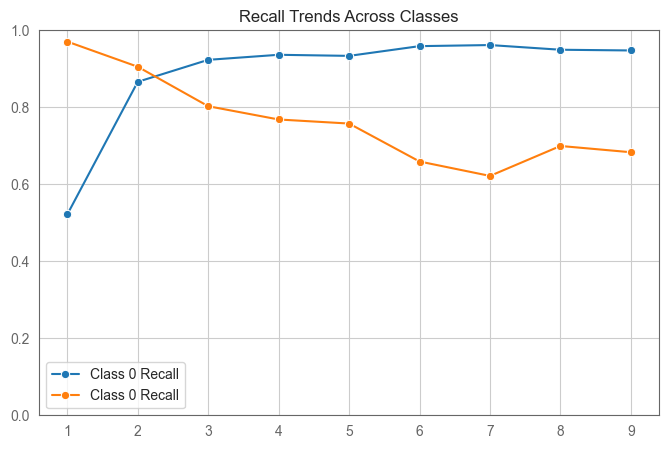

In [423]:
recall_class_0, recall_class_1 = zip(*recall_values)
n_equal = [i for i in range(1,10)]
plt.figure(figsize=(8, 5))
sns.lineplot(x=n_equal, y=recall_class_0,label="Class 0 Recall", marker="o")
sns.lineplot(x=n_equal, y=recall_class_1,label="Class 0 Recall", marker="o")
plt.title("Recall Trends Across Classes")
plt.ylim(0, 1)  # Recall is between 0 and 1
plt.grid(True)
plt.show()

## we see that it is enough to consider TWO random forest trained on equally balanced set. Higher number of them leads to a smaller recall on class 1, plus the recall on the class 0 does not grow much and moreover it increases computational capacity

In [430]:
recall_values = []
weights = np.linspace(0,10,20)
for weight in tqdm(weights, desc="Training Models", ncols=100, bar_format="{l_bar}{bar:30}{r_bar}", colour="green"):
    y_rf_pred, y_rf_test = predictor(2, weight)
    cm = confusion_matrix(y_rf_test, y_rf_pred)
    recall_values.append(calculate_recall(cm))

Training Models: 100%|██████████████████████████████| 20/20 [06:55<00:00, 20.79s/it]


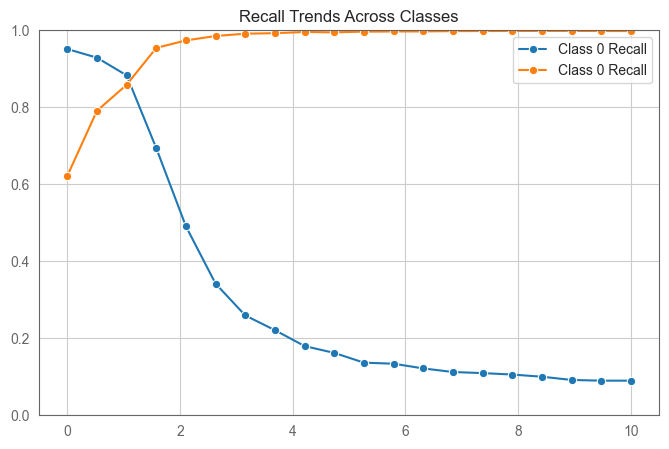

In [ ]:
recall_class_0, recall_class_1 = zip(*recall_values)
plt.figure(figsize=(8, 5))
sns.lineplot(x=weights, y=recall_class_0,label="Class 0 Recall", marker="o")
sns.lineplot(x=weights, y=recall_class_1,label="Class 0 Recall", marker="o")
plt.title("Recall Trends Across Classes")
plt.ylim(0, 1)  # Recall is between 0 and 1
plt.grid(True)
plt.show()

print()

## Best Model --- Thus Far